# Dropout

Dropout is a regularization technique commonly used in classification tasks with neural networks, but it can also be adapted for regression tasks. 

In regression, dropout is applied to the hidden layers of the neural network to prevent overfitting and improve the generalization performance of the model.

### How you can apply dropout in regression using a neural network?

* **Model Architecture**: Define a neural network architecture suitable for regression. This typically includes an input layer, one or more hidden layers, and an output layer with a single neuron (since regression predicts a continuous value).

* **Dropout Layer**: Add dropout layers to the hidden layers of the neural network. Dropout layers randomly set a fraction of the input units to zero during training, which helps prevent overfitting by reducing co-adaptation of neurons.

* **Training**: Train the neural network with dropout enabled during training. Dropout is applied only during training, not during inference (prediction).

* **Prediction**: During prediction (inference), disable dropout to allow all units to contribute to the prediction.

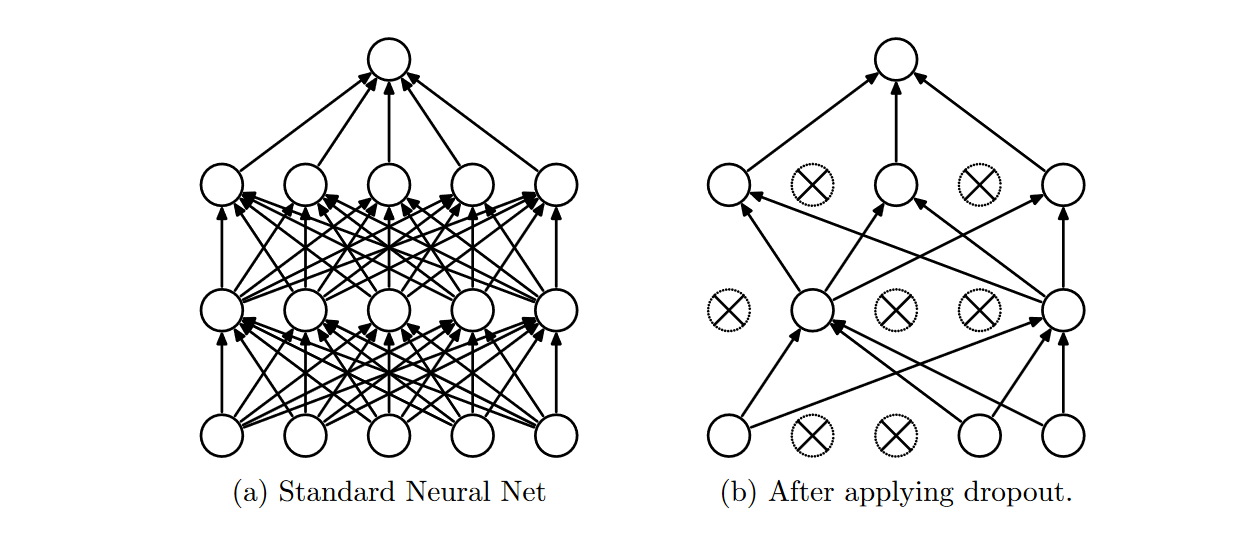

Let's implement this!

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.datasets import make_regression

In [70]:
input_,target_ = make_regression(n_samples= 100, n_features=1, n_targets=1, noise=20)

In [48]:
from sklearn.model_selection import train_test_split

In [71]:
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

In [68]:
import matplotlib.pyplot as plt

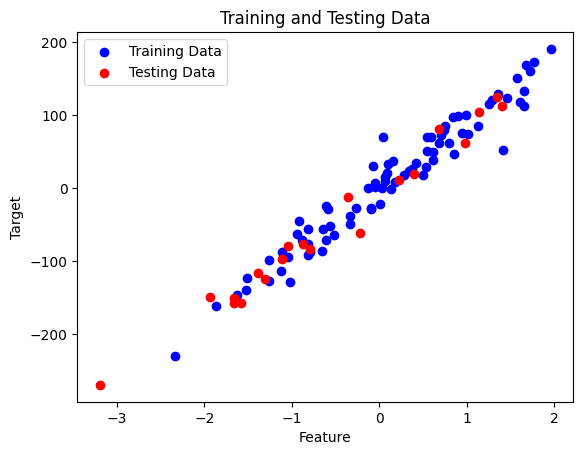

In [72]:
# Plot the training data
plt.scatter(train_input, train_target, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(test_input, test_target, color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Testing Data')
plt.legend()

# Show the plot
plt.show()

## Regression Model

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

2024-04-19 07:39:12.087122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 07:39:12.087214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 07:39:12.089056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [73]:
model_1 = Sequential()

model_1.add(Dense(128, activation = "relu", input_dim = 1))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(train_input, train_target, epochs=500, 
                    validation_data = (test_input, test_target))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 7483.5283 - mse: 7615.6826 - val_loss: 13490.0684 - val_mse: 13490.0684
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7521.2500 - mse: 7373.0254 - val_loss: 12770.7441 - val_mse: 12770.7441
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7144.2261 - mse: 7051.2944 - val_loss: 11581.3301 - val_mse: 11581.3301
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5935.2334 - mse: 5834.9639 - val_loss: 9801.3809 - val_mse: 9801.3809
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5016.3379 - mse: 5119.8979 - val_loss: 7521.2725 - val_mse: 7521.2725
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3445.9619 - mse: 3390.2087 - val_loss: 4828.8149 - val_mse: 4828.8149
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2004.7047 - mse: 1943.3064 - val_loss: 2302.9751 - val_mse: 2302.9751
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1087.8489 - mse: 1088.1892 - val_loss: 

### Evaluate the model


In [74]:
_, train_mse = model_1.evaluate(train_input, train_target, verbose=0)
_, test_mse = model_1.evaluate(test_input, test_target, verbose=0)
print(f'Train Loss: {train_mse}, Test Loss: {test_mse}')

Train Loss: 381.5201721191406, Test Loss: 310.16754150390625


### Prediction

In [75]:
y_pred_1 = model_1.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


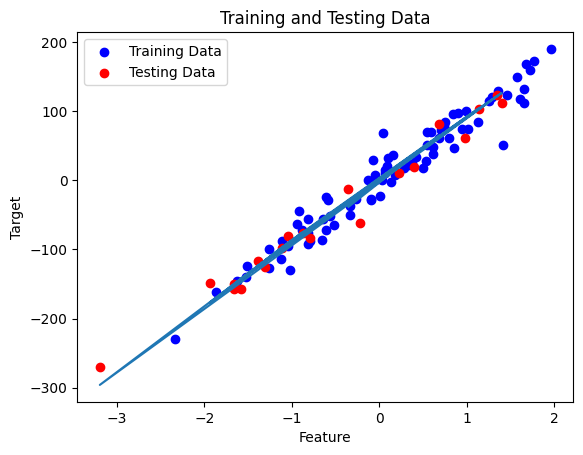

In [76]:
# Plot the training data
plt.scatter(train_input, train_target, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(test_input, test_target, color='red', label='Testing Data')

plt.plot(test_input, y_pred_1)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Testing Data')
plt.legend()

# Show the plot
plt.show()

### Dropout Model

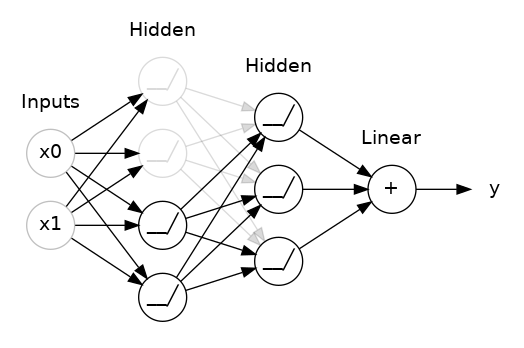

In [77]:
model_2 = Sequential()

model_2.add(Dense(128, activation = "relu", input_dim = 1))
model_2.add(Dropout(0.2))

model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))

model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_2.fit(train_input, train_target, epochs=500, 
                    validation_data = (test_input, test_target))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 7768.9219 - mse: 7762.4746 - val_loss: 13336.2051 - val_mse: 13336.2051
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7354.9463 - mse: 7286.9473 - val_loss: 12297.1299 - val_mse: 12297.1299
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6687.3887 - mse: 6862.9727 - val_loss: 10549.9639 - val_mse: 10549.9639
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6291.9043 - mse: 6381.7661 - val_loss: 8060.9194 - val_mse: 8060.9194
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4917.0933 - mse: 5040.5586 - val_loss: 5058.3203 - val_mse: 5058.3203
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2375.3762 - mse: 2315.0916 - val_loss: 2201.3286 - val_mse: 2201.3286
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1210.2158 - mse: 1273.4529 - val_loss: 512.0754 - val_mse: 512.0754
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 713.4687 - mse: 713.6261 - val_loss: 797.

In [78]:
_, train_mse = model_2.evaluate(train_input, train_target, verbose=0)
_, test_mse = model_2.evaluate(test_input, test_target, verbose=0)
print(f'Train Loss: {train_mse}, Test Loss: {test_mse}')

Train Loss: 369.89385986328125, Test Loss: 356.4372863769531


In [79]:
y_pred_2 = model_2.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


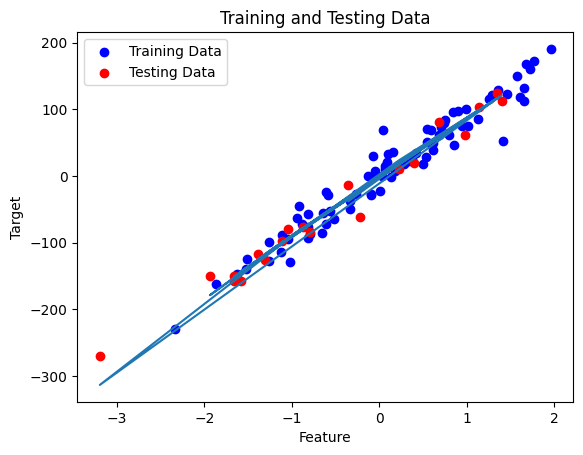

In [80]:
# Plot the training data
plt.scatter(train_input, train_target, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(test_input, test_target, color='red', label='Testing Data')

plt.plot(test_input, y_pred_2)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Testing Data')
plt.legend()

# Show the plot
plt.show()

### Dropout Model 2

In [81]:
model_3 = Sequential()

model_3.add(Dense(128, activation = "relu", input_dim = 1))
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))

model_3.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_3.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_3.fit(train_input, train_target, epochs=500, 
                    validation_data = (test_input, test_target))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 7782.3574 - mse: 7836.8193 - val_loss: 13423.9092 - val_mse: 13423.9092
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7996.9805 - mse: 7986.0181 - val_loss: 12602.8281 - val_mse: 12602.8281
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6995.7114 - mse: 7294.7661 - val_loss: 11194.3984 - val_mse: 11194.3984
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6330.1318 - mse: 6314.8643 - val_loss: 9090.3037 - val_mse: 9090.3037
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5250.3247 - mse: 5502.6870 - val_loss: 6381.7661 - val_mse: 6381.7661
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3478.4731 - mse: 3591.9604 - val_loss: 3371.7156 - val_mse: 3371.7156
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1524.7253 - mse: 1540.9597 - val_loss: 1093.1361 - val_mse: 1093.1361
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1076.2842 - mse: 1094.1340 - val_loss: 

In [82]:
_, train_mse = model_3.evaluate(train_input, train_target, verbose=0)
_, test_mse = model_3.evaluate(test_input, test_target, verbose=0)
print(f'Train Loss: {train_mse}, Test Loss: {test_mse}')

Train Loss: 393.39910888671875, Test Loss: 294.1079406738281


In [83]:
y_pred_3 = model_3.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


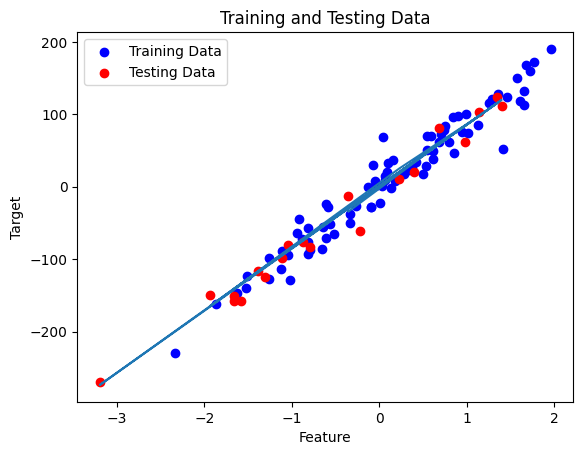

In [84]:
# Plot the training data
plt.scatter(train_input, train_target, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(test_input, test_target, color='red', label='Testing Data')

plt.plot(test_input, y_pred_3)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Testing Data')
plt.legend()

# Show the plot
plt.show()

After applying dropout regularization to the neural network for regression, we observed the following results:

* **Train Loss**: The train loss, as measured by the mean squared error, was found to be 393.40.
* **Test Loss**: The test loss, also measured by the mean squared error, was found to be 294.11.

### Conclusion

These results suggest that the dropout regularization technique helped in reducing overfitting and improving the generalization performance of the neural network. The test loss is lower than the train loss, indicating that the model has learned to generalize well to unseen data.



> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.